In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### The raw tables were first fetched from the following sources:
### Then SQLite is used to joint the aformentioned tables by their FIPS county codes for plotting purpose:
- Number of COVID daily confirmed cases per county since Feb 22nd from [USAFACTS](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/)
- Number of COVID daily deaths per county since Feb 22nd from [USAFACTS](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/)
- COVID Community Vulnerability Index by [Surgo Foundation](https://precisionforcovid.org/ccvi). get data [here](https://docs.google.com/spreadsheets/d/1qEPuziEpxj-VG11IAZoa5RWEr4GhNoxMn7aBdU76O5k/edit#gid=1536551831)  

## Track of daily death pattern based on vulnerability index (02/22 - 08/03)

In [ ]:
# Data from Feb 22 to August 3rd

death = pd.read_csv("deaths_ccvi.csv")

# categorize vulnerability into 3 categories low(<0.35) medimum(0.35<<0.65) high >0.65
def vulnerabilty(x):
    if x <= 0.35:
        y='low'
    elif x > 0.65:
        y='high'
    else:
        y='med'
    return y

death.loc[:,'vul'] = death.apply(lambda x: vulnerabilty(x['CCVI']),axis=1)
death_clean = death.drop(['countyFIPS','County Name','State','stateFIPS'],axis=1)

# Group counties based on vulnerability level (low-med-high)
df= death_clean.groupby(['vul']).sum()
df = df.drop(['CCVI'],axis=1)

# standardize cases per 100,000 in each category
df.iloc[:,:-1] = df.iloc[:,:-1].div(df.population,axis =0).mul(100000,axis=0)
df = df.drop(['population'],axis=1)
df= df.transpose()
df['date'] = df.index

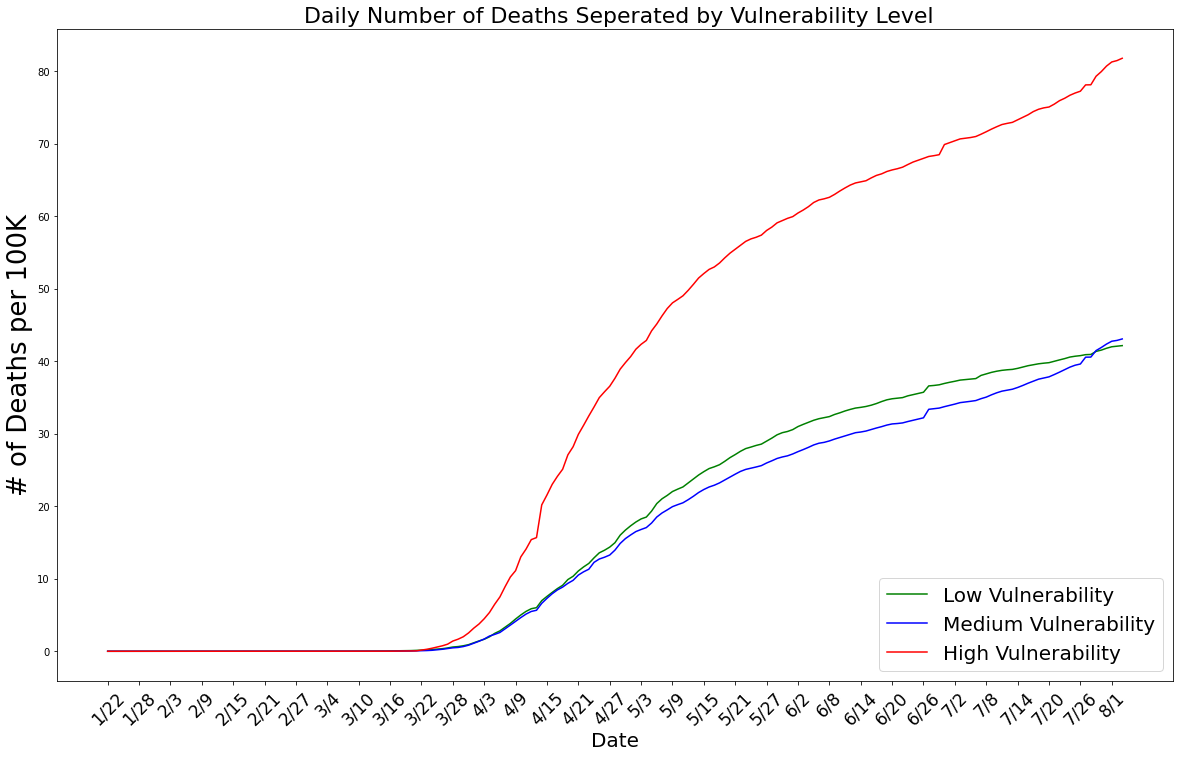

In [15]:
# plotting
fig=plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
#plot
ax.plot('date','low',data=df,color='green',label="Low Vulnerability")
ax.plot('date','med',data=df,color='blue',label="Medium Vulnerability")
ax.plot('date','high',data=df,color='red', label="High Vulnerability")
ax.legend(loc='lower right',fontsize = 20)

#decorate
plt.xlabel('Date',fontsize=20)
plt.title(' Daily Number of Deaths Seperated by Vulnerability Level',fontsize=22)
plt.ylabel('# of Deaths per 100K',fontsize=26)

# adjusting for xticks
dates = df['date']
days = len(dates)
ticks = [dates[i] for i in range(0,days,6)]
labels = [ticks[i][:-5] for i in range(len(ticks))]
plt.xticks(ticks,labels,rotation=45,fontsize=17)
#plt.xticks(rotation=90)


plt.show()